# Wrokflow of the project

1. Importing all the necessary:
    * Numpy
    * Matplotlib
    * MNE-Python
    * Library for microstate analysis (yet to be decided)
    
2. Dataset: 
    * This EEG dataset contains resting-state EEG.
    * The data is recorded with a BioSemi ActiveTwo system, using 64 electrodes following the positional scheme of the extended 10-20 system (10-10).
    * Each datafile comprises four minutes of uninterrupted EEG acquired while the subjects were resting with their eyes closed.
    * The dataset includes EEG from 111 healthy control subjects (the "t1" session), of which a number underwent an additional EEG recording at a later date (the "t2" session).
    * I have only used 't1' session, and hence have 111 data points.
    
2. Importing the raw data as edf file

All the datafiles are imported as .edf file.

3. Applying band-pass filter of 0.1-40 Hz on each of the files. This is done to remove slow-drifts and line noise.

After this, the filtered datafile is saved as a .fif file.

4. Now, we apply ICA (Independant Component Analysis) on the filtered datafiles to remove artifact sources.

    * I've chosen to create 30 components using the 'infomax' method as they describe more than 90% of the data for all the files and it converges for all of them.
    * This step creates ica files for all the 111 subjects.
    * I used the inbuilt function of mne-python find_bad_eog which uses some statistical source (yet to be figured) to find eog sources and marks them. I excluded them from the ica files.
    * Next up, I applied the created ICAs to the data.
    
5. Hence, I got the preprocessed data. Since this is a resting state data, I've decided not to segment the data and do the baseline removal.

6. Next up, I averaged the 111 datasets into a single data. 

In [2]:
# Importing the libraries

import numpy as np
print('Numpy version: ', np.__version__)

import matplotlib.pyplot as plt

import mne
print('MNE-Python: ', mne.__version__)

mne.set_log_level('error')  # reduce extraneous MNE output

Numpy version:  1.24.3
MNE-Python:  1.4.2


### Import the dataset

In [3]:
raws = list()
file_path = "D:\IIIT_Hyderabad\Code\data\sub-"
suffix = "_ses-t1_task-resteyesc_eeg.edf"
for i in range(1,112):
    j = str(i)
    file_name = file_path+j+suffix
    raw = mne.io.read_raw_edf(file_name)
    # Set montage
    montage = 'standard_1005'  # Electrode position file
    raw.set_montage(montage)
    raws.append(raw)

In [3]:
len(raws)

111

C:\Users\Divya Tiwari\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


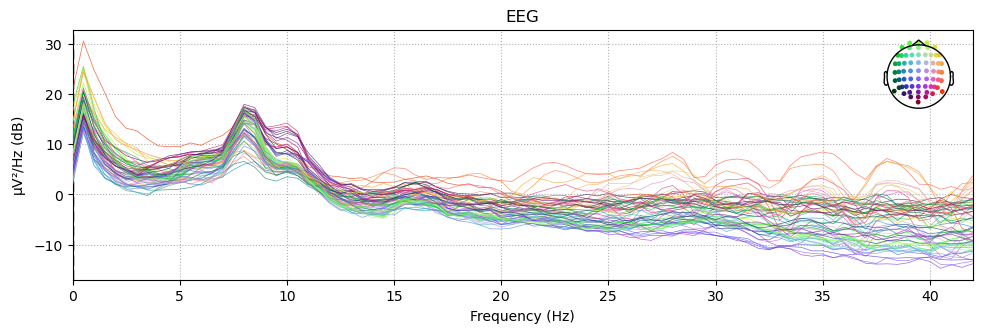

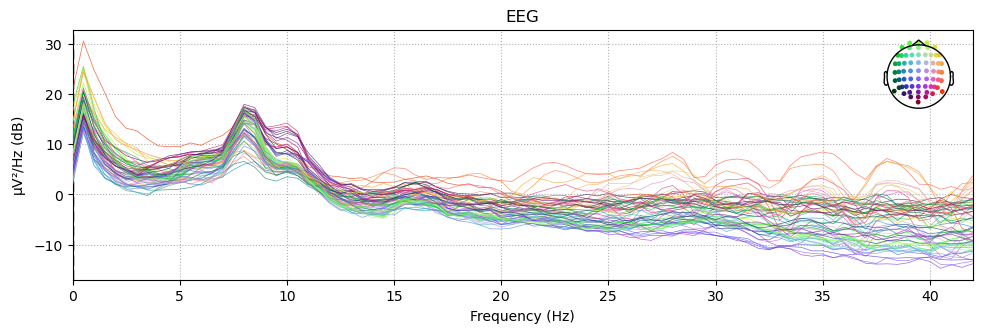

In [4]:
raw = raws[42]
raw.plot_psd(fmax = 42)

### Applying band-pass filter

In [4]:
filters = list()

In [5]:
for i in range(len(raws)):
    raw = raws[i]
    j = str(i+1)
    h_pass = 0.1
    l_pass = 40
    data_filter = raw.load_data().copy().filter(l_freq = h_pass, h_freq = l_pass)
    #data_filter.plot()
    # Save filtered data
    data_filter.save("D:\IIIT_Hyderabad\Code\data_filter\sub-"+j+"_ses-t1_task-resteyesc_eeg_filter.fif", overwrite = True)   
    filters.append(data_filter)

In [6]:
print(len(filters))

7
